In [ ]:
/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/runs/GSE2iso_fg0.7_MHG0.18_RC6.5/lvl4/output

In [1]:
import arepo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
from scipy.stats import binned_statistic_2d
import astropy.units as u
from scipy.spatial import KDTree
from numba import njit

In [2]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [58]:
name = 'GSE2iso_fg0.7_MHG0.18_RC6.5'
name05 = 'GSE2iso_fg0.7_MHG0.5_RC6.5'
num_list = [0, 50, 100, 150, 200, 250, 300]
sn = {}
sn4 = {}
sn4solar = {}
sn4Z12 = {}
sn4M05 = {}
for i in tqdm(num_list):
    # sn[i] = arepo.Snapshot(basepath + 'runs/' + name + '/lvl3/output', i, combineFiles=True)
    sn4[i] = arepo.Snapshot(basepath + 'runs/' + name + '/lvl4-oldcommit/output', i, combineFiles=True)
    # sn4solar[i] = arepo.Snapshot(basepath + 'runs/' + name + '/lvl4-solar/output', i, combineFiles=True) 
    # sn4Z12[i] = arepo.Snapshot(basepath + 'runs/' + name + '/lvl4-Z1.2/output', i, combineFiles=True)
    sn4M05[i] = arepo.Snapshot(basepath + 'runs/' + name05 + '/lvl4/output', i, combineFiles=True)

 86%|████████▌ | 6/7 [00:31<00:05,  5.23s/it]


Exception: could not detect backend for file '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/runs/GSE2iso_fg0.7_MHG0.5_RC6.5/lvl4/output', snapshot 300, filenum None. Specify file format or check file name.

In [59]:
def get_n_T(sn):
    UnitLength = sn.parameters.UnitLength_in_cm
    UnitMass = sn.parameters.UnitMass_in_g
    UnitVelocity = sn.parameters.UnitVelocity_in_cm_per_s

    UnitTime = UnitLength / UnitVelocity
    UnitEnergy = UnitMass * UnitVelocity**2

    HYDROGEN_MASSFRAC = 0.76
    GAMMA = 5./3.
    PROTONMASS = 1.67262178e-24
    BOLTZMANN = 1.38065e-16

    InternalEnergy = sn.part0.InternalEnergy.value
    ElectronAbundance = sn.part0.ElectronAbundance
    Density = sn.part0.Density.value
    
    mu = 4 * PROTONMASS / (1 + 3 * HYDROGEN_MASSFRAC + 4 * HYDROGEN_MASSFRAC * ElectronAbundance)
    T = (GAMMA - 1.) * (InternalEnergy / BOLTZMANN) * (UnitEnergy / UnitMass) * mu

    n = Density / mu
    n *= UnitMass/UnitLength**3
    
    return n, T

In [61]:
def get_n_T_mass_r(sn):
    n = {}
    T = {}
    mass = {}
    r = {}

    for i in sn.keys():
        n[i], T[i] = get_n_T(sn[i])

        center = np.array([sn[i].BoxSize, sn[i].BoxSize, sn[i].BoxSize]) / 2.
        pos = sn[i].part0.pos.value - center
        mass[i] = sn[i].part0.mass.value

        r[i] = np.linalg.norm(pos, axis=1)
    
    return n, T, mass, r

# n, T, mass, r = get_n_T_mass_r(sn)
n4, T4, mass4, r4 = get_n_T_mass_r(sn4)
# n4solar, T4solar, mass4solar, r4solar = get_n_T_mass_r(sn4solar)
# n4Z12, T4Z12, mass4Z12, r4Z12 = get_n_T_mass_r(sn4Z12)
n4M05, T4M05, mass4M05, r4M05 = get_n_T_mass_r(sn4M05)

In [64]:
rbins = np.linspace(0, 100, 100)
Tbins = np.linspace(3, 7, 100)

mbin = {}
mbin4 = {}
mbin4solar = {}
mbin4Z12 = {}
mbin4M05 = {}

for i in num_list:
    # mbin[i], x_edge, y_edge, _ = binned_statistic_2d(r[i], np.log10(T[i]), mass[i], 
                                                     # statistic='sum', bins=[rbins, Tbins])
    mbin4[i], x_edge, y_edge, _ = binned_statistic_2d(r4[i], np.log10(T4[i]), mass4[i], 
                                                     statistic='sum', bins=[rbins, Tbins])
    mbin4solar[i], x_edge, y_edge, _ = binned_statistic_2d(r4solar[i], np.log10(T4solar[i]), mass4solar[i], 
                                                     statistic='sum', bins=[rbins, Tbins])
    
    mbin4Z12[i], x_edge, y_edge, _ = binned_statistic_2d(r4Z12[i], np.log10(T4Z12[i]), mass4Z12[i], 
                                                     statistic='sum', bins=[rbins, Tbins])
    
    mbin4M05[i], x_edge, y_edge, _ = binned_statistic_2d(r4M05[i], np.log10(T4M05[i]), mass4M05[i], 
                                                     statistic='sum', bins=[rbins, Tbins])

KeyError: 300

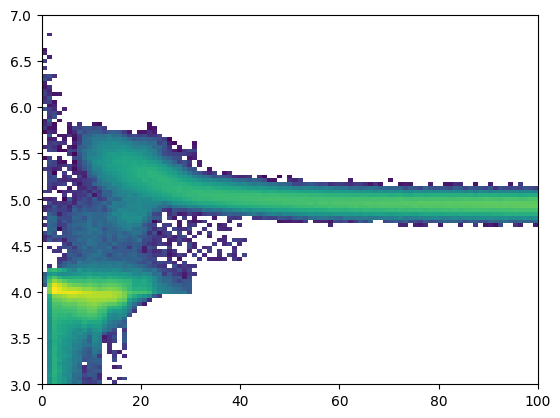

In [14]:
plt.imshow(mbin[300].T, origin='lower', extent=[x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]],
           norm=mpl.colors.LogNorm())
plt.gca().set_aspect('auto')

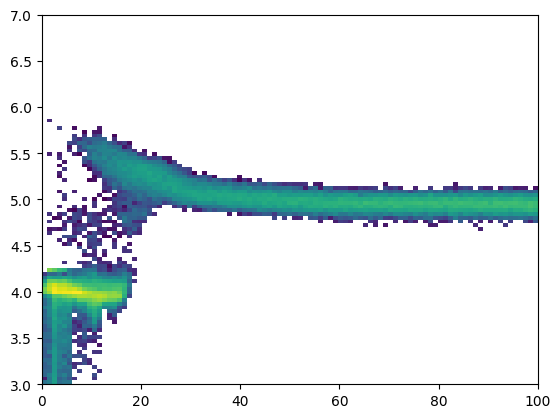

In [15]:
plt.imshow(mbin4[300].T, origin='lower', extent=[x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]],
           norm=mpl.colors.LogNorm())
plt.gca().set_aspect('auto')

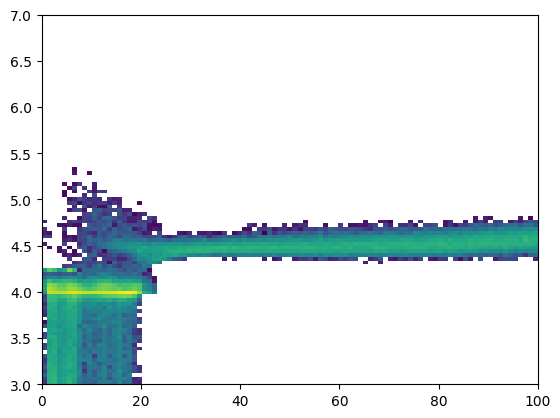

In [16]:
plt.imshow(mbin4solar[300].T, origin='lower', extent=[x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]],
           norm=mpl.colors.LogNorm())
plt.gca().set_aspect('auto')

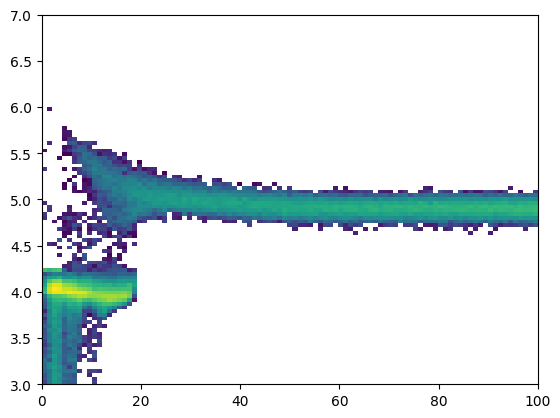

In [33]:
plt.imshow(mbin4Z12[300].T, origin='lower', extent=[x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]],
           norm=mpl.colors.LogNorm())
plt.gca().set_aspect('auto')

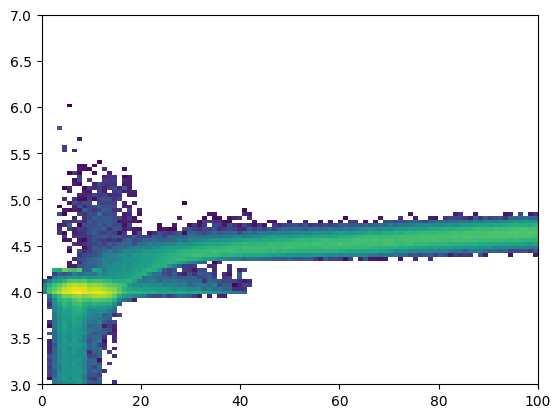

In [66]:
plt.imshow(mbin4M05[250].T, origin='lower', extent=[x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]],
           norm=mpl.colors.LogNorm())
plt.gca().set_aspect('auto')

## cooling time


In [17]:
snapnum = 200

In [20]:
def get_tcool(r, sn, n, snapnum):
    key = np.logical_and(r[snapnum] > 39, r[snapnum] < 41)

    Lambda = sn[snapnum].part0.GFM_CoolingRate.value
    Lambda *= u.erg * u.cm**3 / u.s # erg cm^3 / s

    P = (5./3. - 1) * sn[snapnum].part0.Density.value * sn[snapnum].part0.InternalEnergy.value
    P *= 1E10
    P *=  u.Msun / u.kpc**3 * (u.km/u.s)**2

    nH = n[snapnum] / u.cm**3

    tcool = 1.5 * P / (nH**2 * np.abs(Lambda))
    tcool = tcool.to(u.Gyr)
    return np.median(tcool[key])
    # print(np.median(tcool[key]))

In [23]:
print(get_tcool(r4, sn4, n4, 200))
print(get_tcool(r4solar, sn4solar, n4solar, 200))

0.2828798294067383 Gyr
0.11832734942436218 Gyr


In [98]:
rcut = 40
Menc = 0
for pt in [0, 1, 2, 3, 4]:
    
    center = np.array([sn[snapnum].BoxSize, sn[snapnum].BoxSize, sn[snapnum].BoxSize]) / 2.
    if sn[snapnum].NumPart_Total[pt] > 0:
        part = getattr(sn[snapnum], 'part'+str(pt))
        r = np.linalg.norm(part.pos.value - center, axis=1)
        if sn[snapnum].MassTable[pt] > 0:
            Menc += len(np.where(r < rcut)[0]) * sn[snapnum].MassTable[pt].value
        else:
            Menc += np.sum(part.mass.value[r < rcut])

G = 43018.7
vcsq = G * Menc / rcut
vc = np.sqrt(vcsq)
print('circular velocity', vc)
tff = np.sqrt(2) * (rcut * u.kpc) / (vc * u.km/u.s)
tff = tff.to(u.Gyr)
print('free fall time', tff)

circular velocity 83.61065929862858
free fall time 0.6615458041755082 Gyr


In [101]:
print(np.median(tcool[key]) / tff)

0.4276042983286615


In [41]:
sn_ = sn4[0]
center = np.median(sn_.part1.pos.value, axis=0)

r0 = np.linalg.norm(sn_.part0.pos.value - center, axis=1)
r1 = np.linalg.norm(sn_.part1.pos.value - center, axis=1)
r2 = np.linalg.norm(sn_.part2.pos.value - center, axis=1)
# r3 = np.linalg.norm(sn_.part3.pos.value - center, axis=1)

R200 = 60
M0 = np.sum(sn_.part0.mass.value[r0 < R200])
M1 = sn_.MassTable[1] * len(np.where(r1 < R200)[0])
M2 = sn_.MassTable[2] * len(np.where(r2 < R200)[0])
# M3 = sn_.MassTable[3] * len(np.where(r3 < R200)[0])

print((M0 + M2)/M1)


0.04708688309662969


## 2d slices

In [114]:
nres = 1024

rng = [-80, 80]

@njit
def create_plot_pos(x, y, nres):
    plot_pos = np.zeros((nres*nres, 3))
    for i in range(len(x)):
        for j in range(len(y)):
            plot_pos[i*nres + j][0]=x[i][0]
            plot_pos[i*nres + j][1]=y[0][j]

    return plot_pos

x, z = np.meshgrid(np.linspace(rng[0], rng[1], nres), np.linspace(rng[0], rng[1], nres), indexing='ij')
plot_pos = create_plot_pos(x, z, nres)

In [115]:
center = {}
pos_gas = {}
tree = {}
key = {}

for num in tqdm(num_list):
    center[num] = np.array([sn[num].BoxSize, sn[num].BoxSize, sn[num].BoxSize])/2.
    pos_gas[num] = sn[num].part0.pos.value - center[num]
    

    tree[num] = KDTree(pos_gas[num])
    _, key[num] = tree[num].query(plot_pos)

100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


In [116]:
dens_gas = {}
plot_dens = {}
plot_dens_map = {}

metal_gas = {}
plot_metal = {}
plot_metal_map = {}

T_gas = {}
plot_T = {}
plot_T_map = {}

for num in num_list:
    dens_gas[num] = sn[num].part0.rho.value
    plot_dens[num] = dens_gas[num][key[num]]
    plot_dens_map[num] = np.reshape(plot_dens[num], (nres, nres))
    
    metal_gas[num] = sn[num].part0.GFM_Metallicity
    plot_metal[num] = metal_gas[num][key[num]]
    plot_metal_map[num] = np.reshape(plot_metal[num], (nres, nres))
    
    _, T_gas[num] = get_n_T(sn[num])
    plot_T[num] = T_gas[num][key[num]]
    plot_T_map[num] = np.reshape(plot_T[num], (nres, nres))

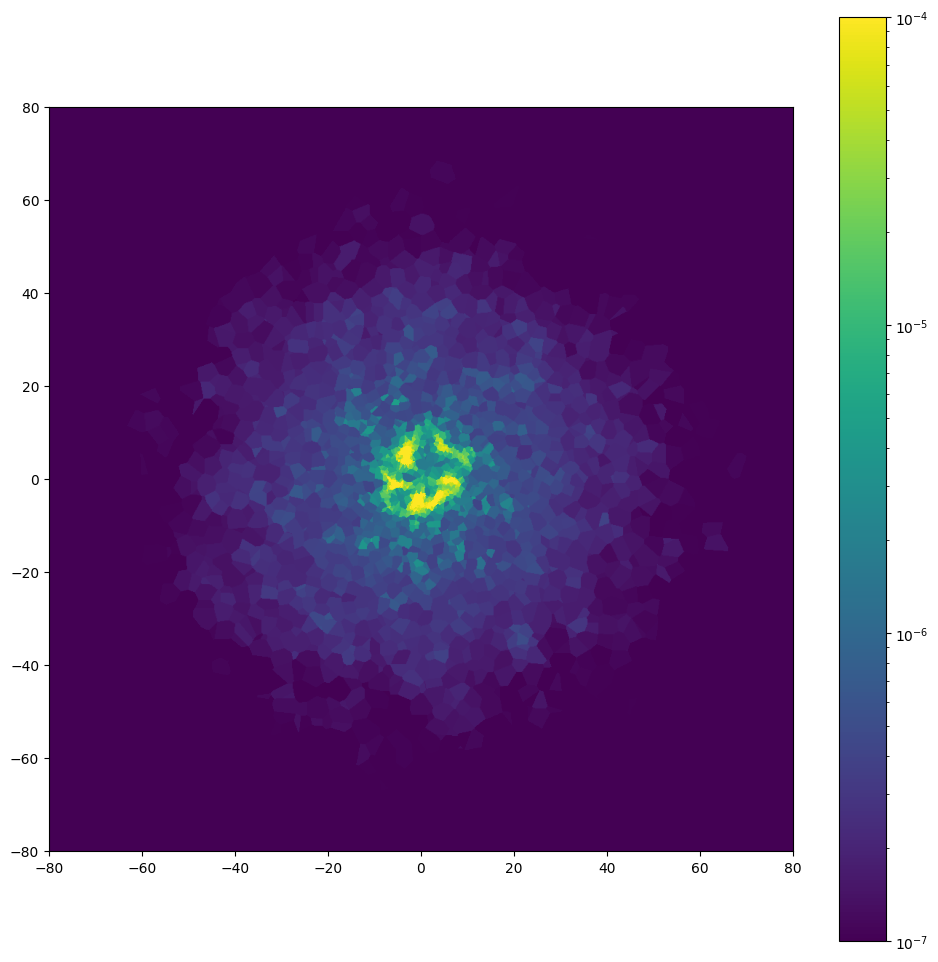

In [122]:
num = 50

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
extent = [rng[0], rng[1], rng[0], rng[1]]
im = ax.imshow(plot_dens_map[num].T, extent=extent, origin='lower', 
               norm=mpl.colors.LogNorm(vmin=1e-7, vmax=1e-4))
fig.colorbar(im, ax=ax)
plt.show()

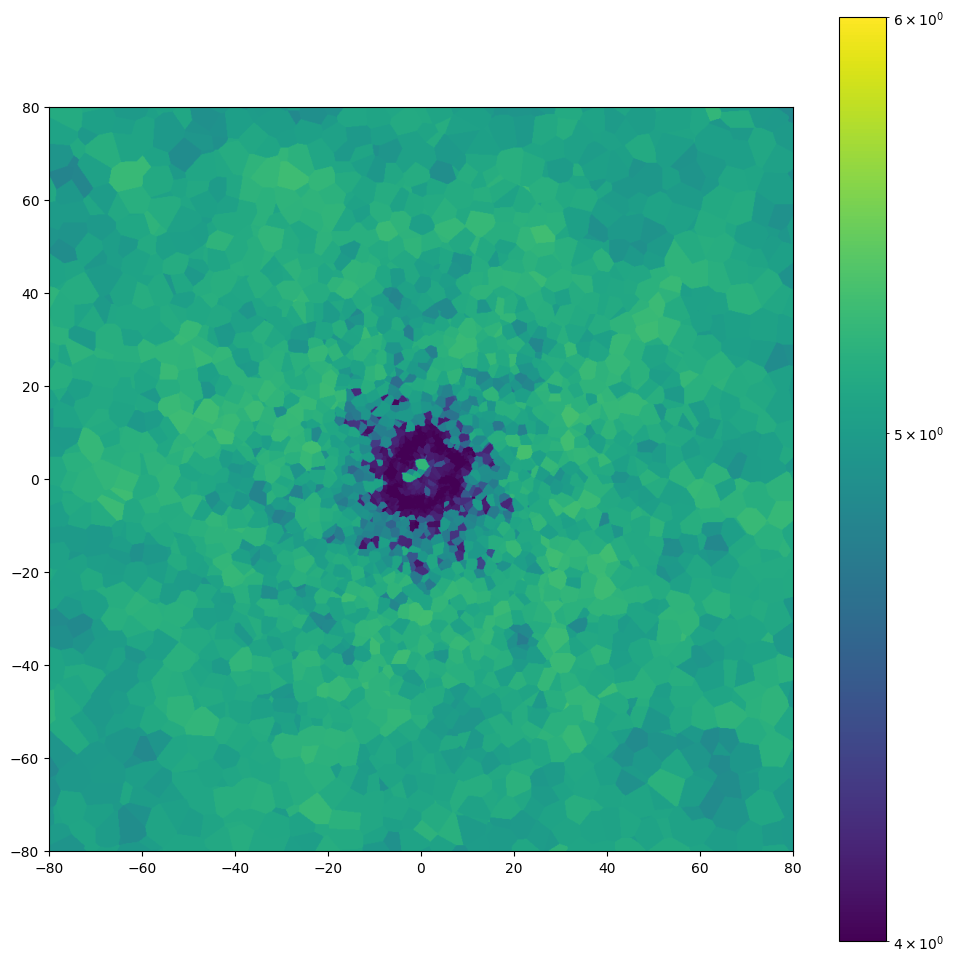

In [123]:
num = 50

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
extent = [rng[0], rng[1], rng[0], rng[1]]
im = ax.imshow(np.log10(plot_T_map[num].T), extent=extent, origin='lower', 
               norm=mpl.colors.LogNorm(vmin=4, vmax=6))
fig.colorbar(im, ax=ax)
plt.show()

## check ics

In [47]:
sn_ = arepo.Snapshot(basepath + 'ics/GSE2iso_fg0.7_MHG0.4_RC6.5/lvl4/GSE_ICs.dat')
center = np.median(sn_.part1.pos, axis=0)

r0 = np.linalg.norm(sn_.part0.pos - center, axis=1)
r1 = np.linalg.norm(sn_.part1.pos - center, axis=1)
r2 = np.linalg.norm(sn_.part2.pos - center, axis=1)
# r3 = np.linalg.norm(sn_.part3.pos.value - center, axis=1)

R200 = 80
M0 = np.sum(sn_.part0.mass[r0 < R200])
M1 = sn_.MassTable[1] * len(np.where(r1 < R200)[0])
M2 = sn_.MassTable[2] * len(np.where(r2 < R200)[0])
# M3 = sn_.MassTable[3] * len(np.where(r3 < R200)[0])

print((M0 + M2)/M1)


Warning end of file '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/ics/GSE2iso_fg0.7_MHG0.4_RC6.5/lvl4/GSE_ICs.dat' not reached yet, but unknowen fields ahead. Thus some items might be missing on the snapshot object.
0.16865496974132957


In [57]:
# now particle masses
mbar = 7.5E3 * 8 / 1E10
mdm = 3.75E4 * 8 / 1E10

Mdisk = sn_.MassTable[2] * sn_.NumPart_Total[2]
print(Mdisk/mbar)

Mhalo = sn_.MassTable[1] * sn_.NumPart_Total[1]
print(Mhalo/mdm)


8347.89909244158
333126.0886542397


In [56]:
np.unique(sn_.part0.mass)

array([6.000133e-06], dtype=float32)

In [54]:
mbar

6e-06